In [27]:
from pathlib import Path

import numpy as np
import tensorflow as tf
import wget
from tensorflow.keras import regularizers
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Embedding, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow.keras.utils as ku

In [28]:
fp = Path.cwd() / "datasets"
url = "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt"
file = fp / "irish-lyrics-eof.txt"

if not file.exists():
    wget.download(url, out=str(fp))
else:
    pass

In [29]:
tokenizer = Tokenizer()

data = open(file).read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# print(tokenizer.word_index)
# print(total_words)

In [30]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[: i + 1]
        input_sequences.append(n_gram_sequence)

# pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(
    pad_sequences(input_sequences, maxlen=max_sequence_len, padding="pre")
)

# create predictors and label
predictors, label = input_sequences[:, :-1], input_sequences[:, -1]
print(predictors, label)
label = ku.to_categorical(label, num_classes=total_words)

[[  0   0   0 ...   0   0  51]
 [  0   0   0 ...   0  51  12]
 [  0   0   0 ...  51  12  96]
 ...
 [  0   0   0 ...   0   0  47]
 [  0   0   0 ...   0  47 105]
 [  0   0   0 ...  47 105 138]] [  12   96 1217 ...  105  138  184]


In [33]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length = max_sequence_len-1))
model.add(Bidirectional(LSTM(150,return_sequences=True)))
model.add(Dropout(.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 15, 100)           269000    
_________________________________________________________________
bidirectional_4 (Bidirection (None, 15, 300)           301200    
_________________________________________________________________
dropout_3 (Dropout)          (None, 15, 300)           0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1345)              135845    
_________________________________________________________________
dense_1 (Dense)              (None, 2690)              3620740   
Total params: 4,487,185
Trainable params: 4,487,185
Non-trainable params: 0
____________________________________________

In [34]:
history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
377/377 [==============================] - 14s 20ms/step - loss: 7.3478 - accuracy: 0.0588
Epoch 2/100
377/377 [==============================] - 7s 20ms/step - loss: 6.2558 - accuracy: 0.0708
Epoch 3/100
377/377 [==============================] - 8s 20ms/step - loss: 6.1301 - accuracy: 0.0642
Epoch 4/100
377/377 [==============================] - 7s 20ms/step - loss: 6.0049 - accuracy: 0.0692
Epoch 5/100
377/377 [==============================] - 7s 20ms/step - loss: 5.8818 - accuracy: 0.0836
Epoch 6/100
377/377 [==============================] - 8s 20ms/step - loss: 5.8308 - accuracy: 0.0845
Epoch 7/100
377/377 [==============================] - 8s 20ms/step - loss: 5.7150 - accuracy: 0.0968
Epoch 8/100
377/377 [==============================] - 29s 78ms/step - loss: 5.5763 - accuracy: 0.1094
Epoch 9/100
377/377 [==============================] - 7s 20ms/step - loss: 5.5237 - accuracy: 0.1071
Epoch 10/100
377/377 [==============================] - 8s 20ms/step - loss: 5.4

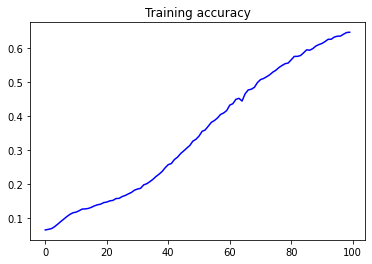

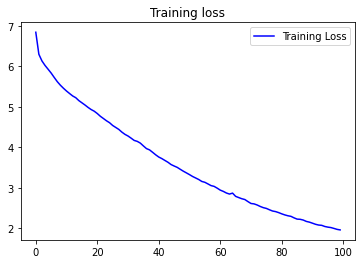

In [35]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [36]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

c:\users\josephdavis\desktop\tensorflow notebooks\env\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Help me Obi Wan Kenobi, you're my only hope oer me in your love and tapping as the street they began and kilrush can be seen to the barley as the world betrays their pepper today and ill die in the bow did look still be we have be one down by your hat and throw it on the sea is the sea is the sea is wide back it was standing by erin see old town they done for would run from me one day so sweet saint wonder hair by the bow land of the rocky road to dublin city that a dub row de chanters and
